In [ ]:
# !pip install 'gym[box2d]'
# !apt-get install python-opengl -y
# !apt install xvfb -y
# !pip install pyvirtualdisplay
# !pip install https://github.com/pyglet/pyglet/archive/pyglet-1.5-maintenance.zip
# !apt-get install ffmpeg -y

In [ ]:
# env.render() gives error in Colab
# below code solves display error
# https://github.com/openai/gym/issues/1898

from pyvirtualdisplay import Display
display = Display(visible=0,size=(600,600))
display.start()

In [2]:
import gym
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

from maze_env import Maze

In [3]:
# create Maze environment
env = Maze()

In [4]:
# reset the environment
initial_state = env.reset()
print(f"The new episode will start in state: {initial_state}")

The new episode will start in state: (0, 0)


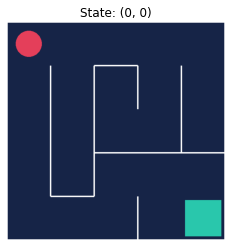

In [5]:
# plot maze
frame = env.render(mode="rgb_array")
plt.axis('off')
plt.title(f"State: {initial_state}")
plt.imshow(frame)

In [6]:
# lets take some action
"""
        Num     Action
        0       Move up
        1       Move right
        2       Move down
        3       Move left
"""

action = 2
next_state, reward, done, info = env.step(action)

print(f"After moving down 1 row, the agent is in state: {next_state}")

print(f"After moving down 1 row, we got a reward of: {reward}")
print("After moving down 1 row, the task is", "" if done else "not", "finished")

After moving down 1 row, the agent is in state: (1, 0)
After moving down 1 row, we got a reward of: -1.0
After moving down 1 row, the task is not finished


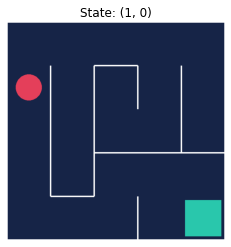

In [7]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"State: {next_state}")
plt.imshow(frame)

In [8]:
# completes the task and closes the environment, releasing the associated resources.
env.close()

In [9]:
# create new env
env = Maze()

In [10]:
# state space (row,col) --> which imples 5x5 = 25 possible state
print(f"For example, the initial state is: {env.reset()}")
print(f"The space state is of type: {env.observation_space}")

For example, the initial state is: (0, 0)
The space state is of type: MultiDiscrete([5 5])


In [11]:
print(f"An example of a valid action is: {env.action_space.sample()}")
print(f"The action state is of type: {env.action_space}")

An example of a valid action is: 0
The action state is of type: Discrete(4)


In [12]:
# lets take 3 action and generate trajectory

env = Maze()
state = env.reset()
trajectory = []
for _ in range(3):
    action = env.action_space.sample()
    next_state, reward, done, extra_info = env.step(action)
    trajectory.append([state, action, reward, done, next_state])
    state = next_state
env.close()

print(f"Congrats! You just generated your first trajectory:\n{trajectory}")

Congrats! You just generated your first trajectory:
[[(0, 0), 2, -1.0, False, (1, 0)], [(1, 0), 0, -1.0, False, (0, 0)], [(0, 0), 0, -1.0, False, (0, 0)]]


In [15]:
# create one episode i.e. take action till task is achived

env = Maze()
state = env.reset()
episode = []
done = False
while not done:
    action = env.action_space.sample()
    next_state, reward, done, extra_info = env.step(action)
    episode.append([state, action, reward, done, next_state])
    state = next_state
    env.close()

print(f"Congrats! You just generated your first episode:")



Congrats! You just generated your first episode:


In [17]:
len(episode)

782

In [18]:
episode[0]

[(0, 0), 2, -1.0, False, (1, 0)]

In [19]:
# lets compute discounted rewards
env = Maze()
state = env.reset()
done = False
gamma = 0.99
G_0 = 0
t = 0
while not done:
    action = env.action_space.sample()
    _, reward, done, _ = env.step(action)
    G_0 += (gamma ** t) * reward
    t += 1
env.close()

print(
    f"""It took us {t} moves to find the exit, 
    and each reward r(s,a)=-1, so the return amounts to {G_0}""")

It took us 342 moves to find the exit, 
    and each reward r(s,a)=-1, so the return amounts to -96.78458856169604


In [20]:
# define ranndom policy basis which we will take action
def random_policy(state):
    return np.array([0.25] * 4)

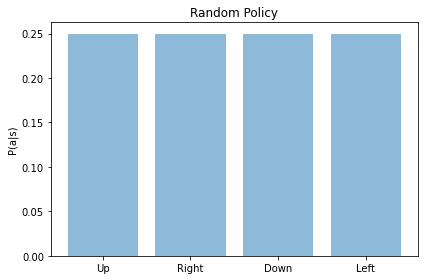

In [21]:
# random policy
env = Maze()
state = env.reset()

# action probabilities
action_probabilities = random_policy(state)

objects = ('Up', 'Right', 'Down', 'Left')
y_pos = np.arange(len(objects))

plt.bar(y_pos, action_probabilities, alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('P(a|s)')
plt.title('Random Policy')
plt.tight_layout()

plt.show()


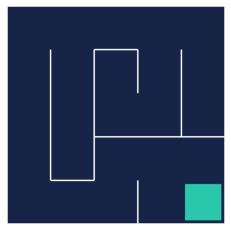

In [22]:
# lets play with random policy

env.reset()
done = False
img = plt.imshow(env.render(mode='rgb_array')) 
while not done:
    action = np.random.choice(range(4), 1, p=action_probabilities)
    _, _, done, _ = env.step(action)
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
env.close()